In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('income-Kmeans.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


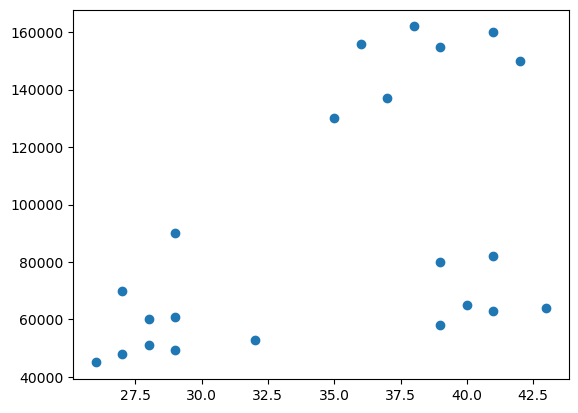

In [9]:
plt.scatter(df['Age'], df['Income($)'])

In [11]:
scaler = MinMaxScaler()
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

In [12]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [13]:
df.drop("Name", axis = 1, inplace = True)

## **Elbow Method**

In [16]:
scores_list = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    #fit kmeans_model
    kmeans_model.fit(df)
    scores_list.append(kmeans_model.inertia_)

Text(0, 0.5, 'Sum of Squared')

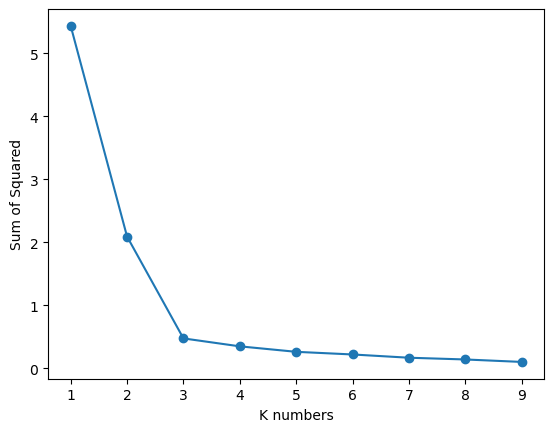

In [18]:
plt.plot(k_range, scores_list, marker = 'o')
plt.xlabel("K numbers")
plt.ylabel("Sum of Squared")

## **silhouette score**

In [22]:
from sklearn.metrics import silhouette_score

scores_list = []
silhouette_score_list = []

k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    #fit & predict means_model 
    y_pred = kmeans_model.fit_predict(df)
    
    scores_list.append(kmeans_model.inertia_)
    
    silhouette_score_list.append(silhouette_score(df, y_pred))
    
    print("K = ", k , " = " , kmeans_model.inertia_)
    print("Silhouette Score = %0.4f" % silhouette_score(df, y_pred))

K =  2  =  2.0911363886990775
Silhouette Score = 0.5601
K =  3  =  0.4750783498553096
Silhouette Score = 0.7130
K =  4  =  0.34910470944195654
Silhouette Score = 0.6257
K =  5  =  0.2621792762345213
Silhouette Score = 0.4814
K =  6  =  0.22020960864009398
Silhouette Score = 0.4750
K =  7  =  0.1685851223602976
Silhouette Score = 0.4522
K =  8  =  0.14083648477890337
Silhouette Score = 0.3228
K =  9  =  0.10188787724979426
Silhouette Score = 0.3256


Text(0, 0.5, 'silhouette_score')

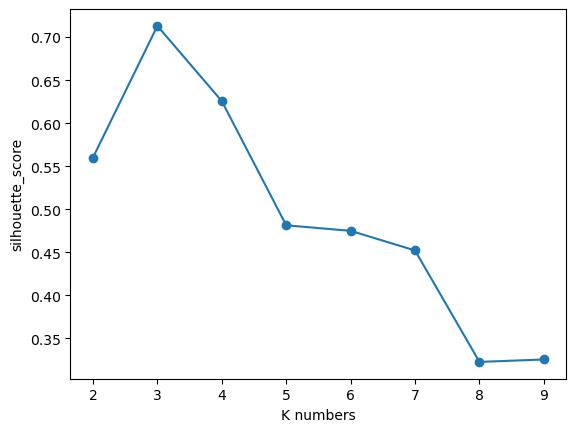

In [23]:
plt.plot(k_range, silhouette_score_list, marker = 'o')
plt.xlabel("K numbers")
plt.ylabel("silhouette_score")

## **Kmeans model**

In [24]:
kmeans_model = KMeans(n_clusters = 3, random_state = 42)
    #fit & predict means_model 
y_pred = kmeans_model.fit_predict(df)

In [25]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
df['Cluster'] = y_pred
df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [27]:
kmeans_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [29]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

In [30]:
df0

,Age,Income($),Cluster
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0


In [31]:
df1

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1
12,0.058824,0.025641,1
13,0.117647,0.051282,1
14,0.176471,0.038462,1
15,0.352941,0.068376,1


In [32]:
df2

,Age,Income($),Cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


In [35]:
kmeans_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

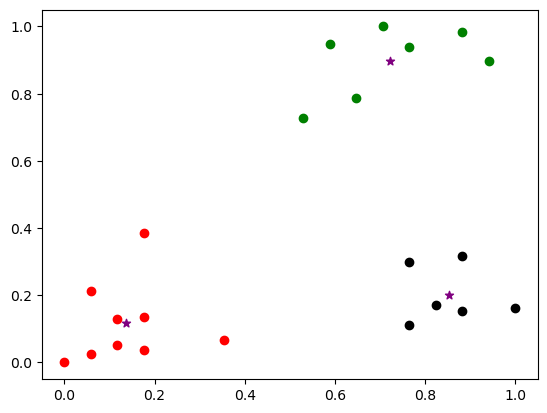

In [34]:
plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'red')
plt.scatter(df2.Age, df2['Income($)'], color = 'black')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = 'purple',
           marker = "*", label = 'centroid')